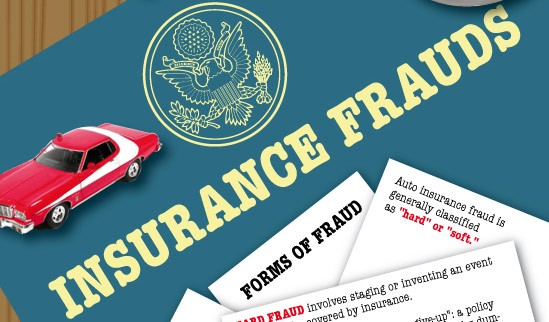

The goal of this project is to build a model that can detect auto insurance fraud. The challenge behind fraud detection 
in machine learning is that frauds are far less common as compared to legit insurance claims. This type of problems is 
known as imbalanced class classification.

Frauds are unethical and are losses to the company. By building a model that can classify auto insurance fraud, 
I am able to cut losses for the insurance company. Less losses equates to more earning.

## CHANGING DIRECTORY 

In [225]:
import os
os.chdir(r'C:\Users\praka\OneDrive\Desktop\METRO\DATA_MINNING\DMSAM_PROJECT\LOGISTIC_REGRESSION')
os.getcwd()

'C:\\Users\\praka\\OneDrive\\Desktop\\METRO\\DATA_MINNING\\DMSAM_PROJECT\\LOGISTIC_REGRESSION'

## IMPORT LIBRARIES

In [226]:

# Importing the numpy and pandas package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 


# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns




## IMPORT DATA

In [227]:
df= pd.read_csv('insurance_claims.csv')


## STRUCTURE OF DATA

In [228]:
#getting the shape of data
df.shape

(1000, 39)

In [229]:
#getting number of columns
df.shape[1]

39

In [230]:
#getting number of rows
df.shape[0]

1000

In [231]:
#checking  number of obs and columns ,index of columns, name of columns, number of non_null values and datatype, (memory usage,...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [232]:
# Checking the head of the dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [233]:


# Checking the head of the dataset
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [234]:
#drop duplicate obs from train data set
df=df.drop_duplicates()

## Missing Values

In [235]:
# counting missing values
df.apply(lambda x: sum(x.isnull()))

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [236]:
#There are some values with "?"  in categorical variables

df1 = df.replace('?',np.NaN)
df1.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [237]:
def percentage_of_miss():
    df2 = df1[df1.columns[df1.isnull().sum()>1]]
    total_miss = df2.isnull().sum().sort_values(ascending=False)
    percent_miss = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total_miss,percent_miss],axis=1,keys=['Number of missing','Percentage'])
    return(missing_data)

percentage_of_miss()
    

,Number of missing,Percentage
property_damage,360,0.360
police_report_available,343,0.343
collision_type,178,0.178


In [238]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [239]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N





## DATA EXPLORATION (VARIABLES)

<AxesSubplot:>

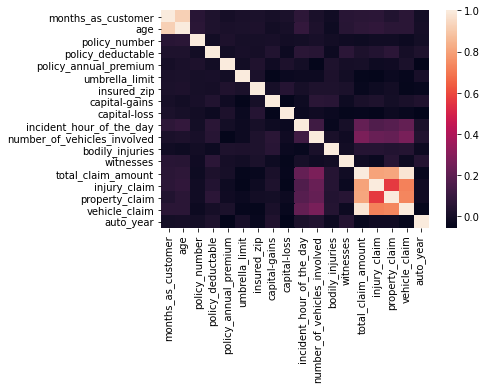

In [240]:
#Correlation in the X DataFrame
import seaborn as sns
sns.heatmap(df.corr())

CONCLUSION :  Probably because drivers buy auto insurance when they own a car and this time measure only increases with age.
claims are all correlated with each other as total claim is sum of all other claims.

The other claims provide precise hidden patterns & some granularity that will not otherwise be captured by total claims. 
Thus, these variables were kept.



## 5 NUMBER SUMMARY

In [241]:
#Feature description
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [242]:
#Levels of fraud_reported as it is y the dependent or the target variable
FR=df['fraud_reported'].value_counts()
FR

N    753
Y    247
Name: fraud_reported, dtype: int64

C:\Users\praka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1, 'Bar chart for Fraud Reported')

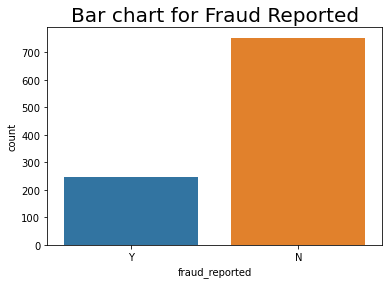

In [243]:
#countplot
sns.countplot(df['fraud_reported'])
plt.title("Bar chart for Fraud Reported", y=1, fontdict={"fontsize": 20})

In [244]:
#CONCLUSION : The dataset is imbalanced almost in the ratio of 75:25

There were missing values in the dataset. There were missing Values in the Columns Collision type(178),
property damage(360),police report available(343). Dropping them will not be a feasible option because 
there are few observations in the data. Had there been lots of observations,we could have gone ahead 
and dropped them. In this case since the missing values are categorical in Nature, we can replace with 
most frequent or mode value.But there is a certain risk attached to it ,that it will have biasness attached to it. 

So in this case I have followed following 3 approches:
1) Missing values with mode
2) Missing values with 0
3) Missing values with previous patterns(KNN)



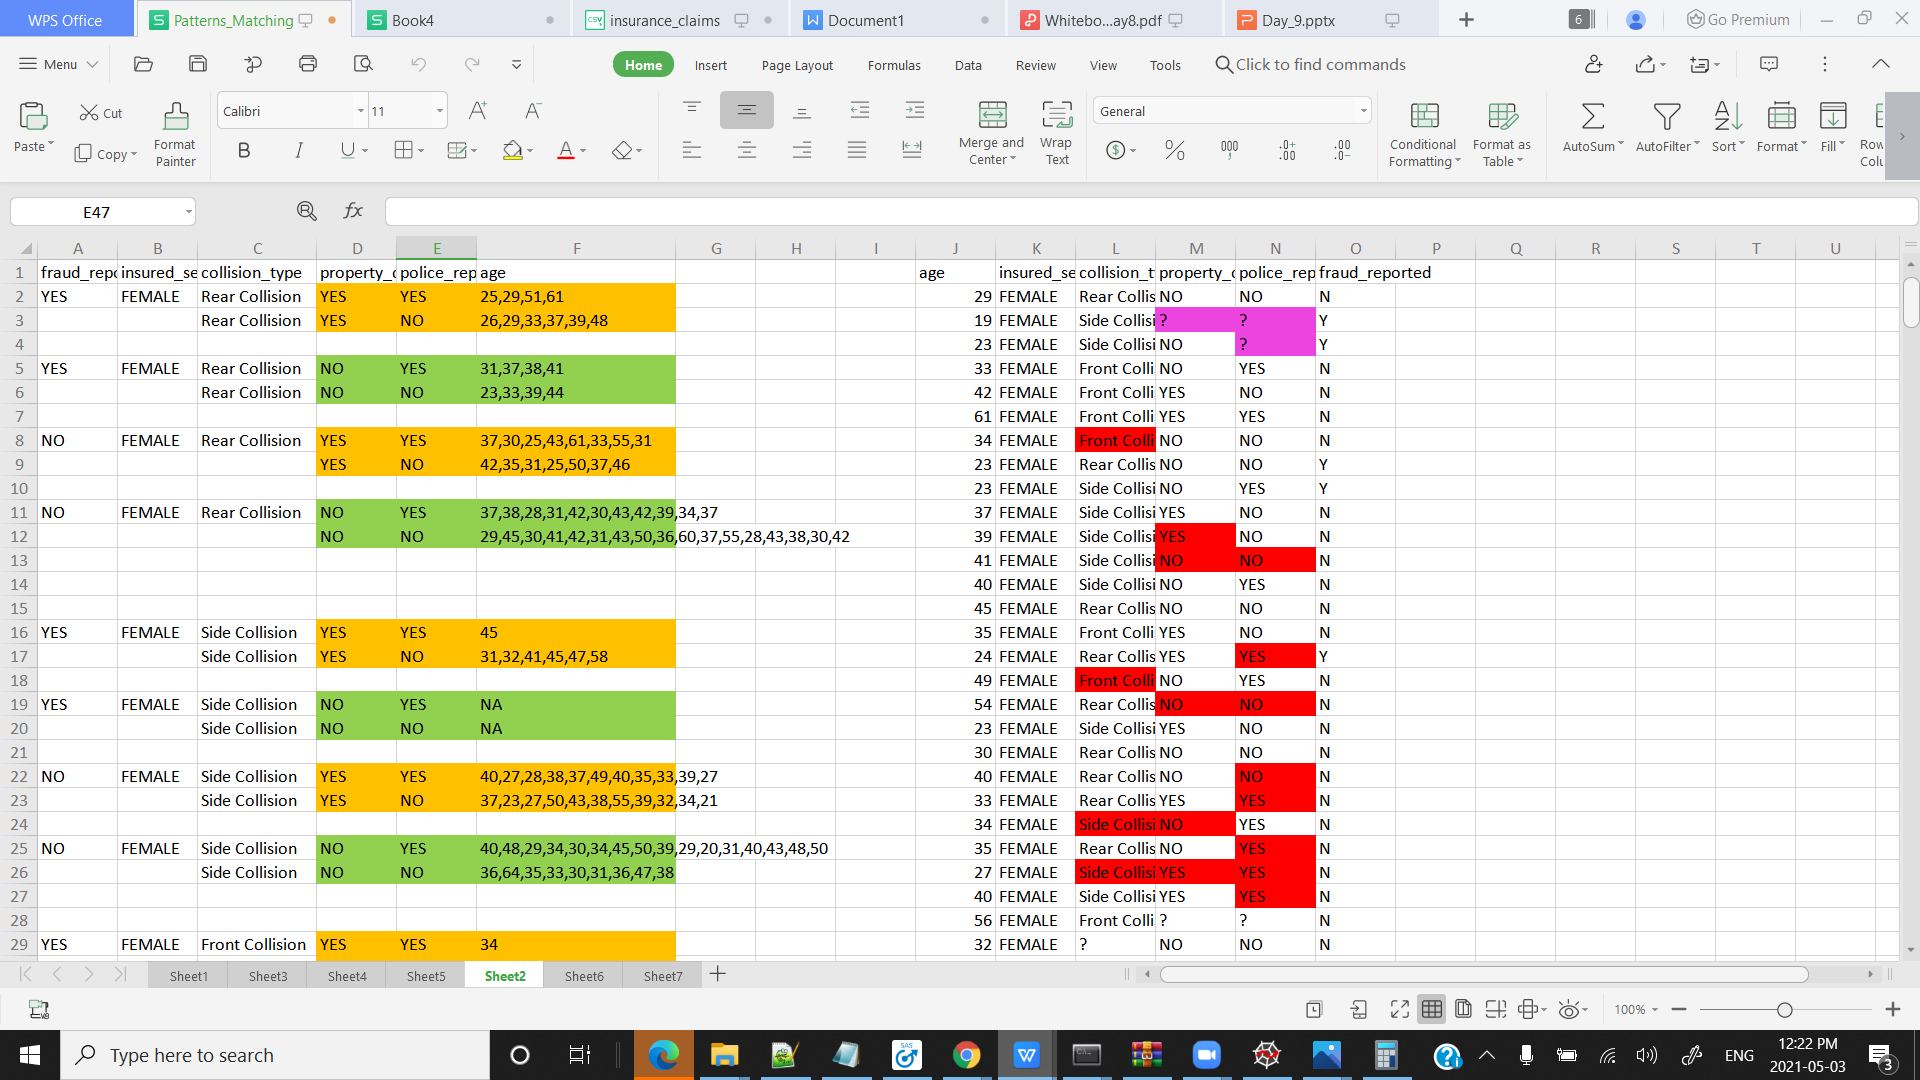

fraud_reported     N   Y
collision_type          
?                162  16
Front Collision  184  70
Rear Collision   201  91
Side Collision   206  70


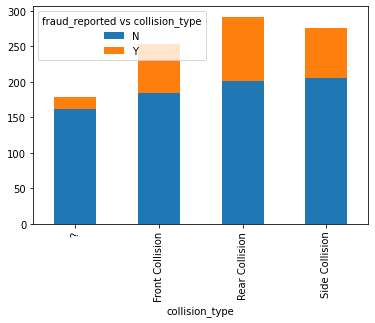

In [245]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df.collision_type, df.fraud_reported)
print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='fraud_reported vs collision_type')

plt.show()

fraud_reported     N    Y
property_damage          
?                257  103
NO               272   66
YES              224   78


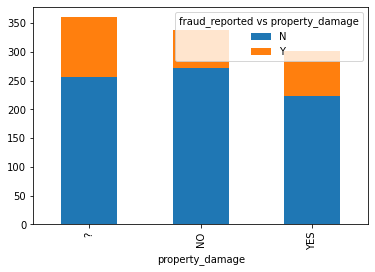

In [246]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df.property_damage, df.fraud_reported)
print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='fraud_reported vs property_damage')

plt.show()

fraud_reported             N   Y
police_report_available         
?                        254  89
NO                       257  86
YES                      242  72


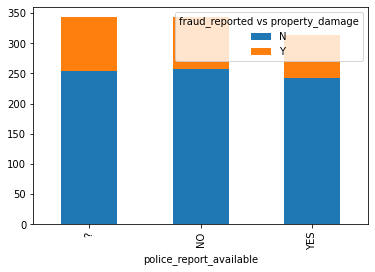

In [247]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df.police_report_available, df.fraud_reported)
print(ct)
ct.plot.bar(stacked=True)
plt.legend(title='fraud_reported vs property_damage')

plt.show()

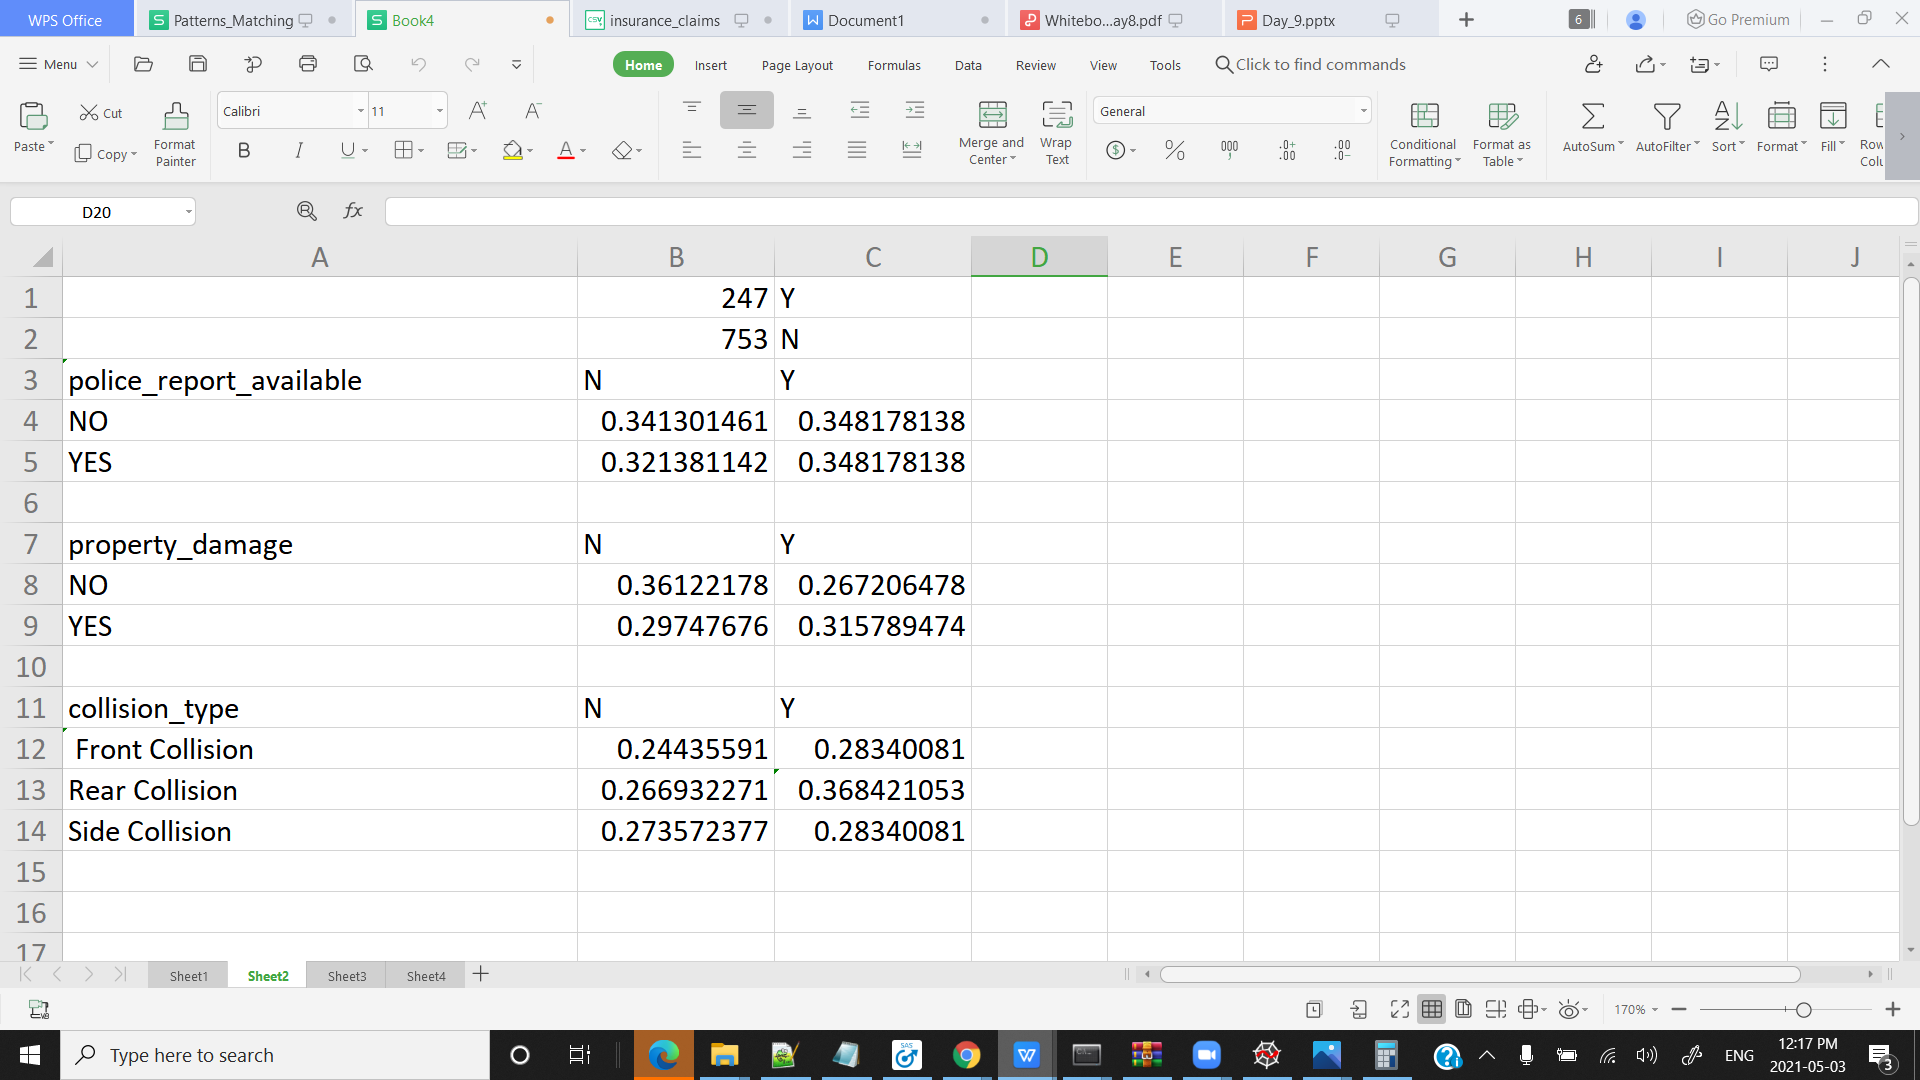

CONCLUSION :  From the above graphs for missing values it can be  concluded that there is 50% chance to 
exist in either of the category.This is known as assuming that the missing value is missing completely at random (MCAR).

In [248]:
#Checking the levels for categorical variable incident state

In [249]:
 df["incident_state"].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [250]:
#Encoding the target variable with 1 & 0

In [251]:
df['fraud_reported'].replace(to_replace='Y', value=1,inplace=True)
df['fraud_reported'].replace(to_replace='N', value=0,inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [252]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


## Derived Variables

CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability 
coverage and Property Damage Liability coverage per occurrence or accident.
It is very important variable which cannot drop 
The way it is mentioned in the dataset is in differenet format 
I have considered this variable as csl for bodily injuries & csl for property damage & derived two new variables from this variable


In [253]:
#Extracting the values from the given variable for new derived variable

df['csl_per_person']=df.policy_csl.str.split('/',expand=True)[0]
df['csl_per_property_damage']=df.policy_csl.str.split('/',expand=True)[1]

In [254]:
df['csl_per_person'].head()
df['csl_per_property_damage'].head()

0     500
1     500
2     300
3     500
4    1000
Name: csl_per_property_damage, dtype: object

In [255]:
#auto_year is linked to vehicle age so this could be the important variable for insurance company for determining the 
#claim amount for property damage 


In [256]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [257]:
#Since this dataset is for 2015 year i.e. the incident date is for 2015 year so tocalculate vehicle's age I am considering
#2015 as the year

df['vehicle_age'] = 2015-df['auto_year']
df['vehicle_age'].head(10)

0    11
1     8
2     8
3     1
4     6
5    12
6     3
7     0
8     3
9    19
Name: vehicle_age, dtype: int64

In [258]:
#Factorize according to the time period of the day
bins=[-1,3,6,9,12,17,20,24] 
names = ['past_midnight','early_morning','morning','fore-noon','after-noon','evening','night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day,bins,labels=names).astype(object)
df[['incident_hour_of_the_day','incident_period_of_day']].head(20)


,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,after-noon


In [259]:
#Checking Categorical variables
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'csl_per_person', 'csl_per_property_damage', 'incident_period_of_day'],
      dtype='object')

In [260]:
df = df.drop(['policy_number','policy_csl','insured_zip','policy_bind_date','incident_date','incident_location','incident_hour_of_the_day','auto_year'], axis=1)
df.head(2)


,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_property_damage,vehicle_age,incident_period_of_day
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,6510,13020,52080,Saab,92x,1,250,500,11,early_morning
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,780,780,3510,Mercedes,E400,1,250,500,8,morning


## Categorical Columns

In [261]:
df_cat = df.select_dtypes(include="object")
df_cat.columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'csl_per_person', 'csl_per_property_damage', 'incident_period_of_day'],
      dtype='object')

In [262]:
#Dropped irrelevant columns which has too many levels for eg. policy_number,policy_bind_date, incident_date,'insured_zip'
#Also dropped the original variables from which I have got derived variables eg. 'policy_csl','incident_date','incident_location','incident_hour_of_the_day','auto_year'

## ONE-HOT ENCODING

In [1]:
dummies = pd.get_dummies(df[[
'policy_state',
'insured_sex',
'insured_education_level',
'insured_occupation',
'insured_hobbies',
'insured_relationship',
'incident_type',
'incident_severity',
'authorities_contacted',
'incident_state',
'incident_city',
'auto_make',
'auto_model',
'csl_per_person',
'csl_per_property_damage',
'incident_period_of_day']])

dummies = dummies.join(df[[
'collision_type',
'property_damage',
'police_report_available',
'fraud_reported']])

dummies.head()

NameError: name 'pd' is not defined

In [264]:
#Separated X as independent variables & y as dependent variable
X= dummies.iloc[:,0:-1]
y= dummies.iloc[:,-1]

In [265]:
print(len(X.columns))
X.columns

148


Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD',
       ...
       'incident_period_of_day_after-noon',
       'incident_period_of_day_early_morning',
       'incident_period_of_day_evening', 'incident_period_of_day_fore-noon',
       'incident_period_of_day_morning', 'incident_period_of_day_night',
       'incident_period_of_day_past_midnight', 'collision_type',
       'property_damage', 'police_report_available'],
      dtype='object', length=148)

In [266]:
#Missing values are existing as  ? in this dataset so either we have to replace it with mode or
#consider as another  level

In [267]:
#Impute missing values with 0

In [268]:
import sklearn
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X['collision_en'] 
X[['collision_type','collision_en']]


# Encoding the variable
#fit = df.apply(lambda x: d[x.name].fit_transform(x))

,collision_type,collision_en
0,Side Collision,3
1,?,0
2,Rear Collision,2
3,Front Collision,1
4,?,0
...,...,...
995,Front Collision,1
996,Rear Collision,2
997,Side Collision,3
998,Rear Collision,2


In [269]:

#Replacing the binary variables with the mode
#property_damage and police_report_available are binary classification; so, in place of ‘?’, I will replace those with 0.

X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)

X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)


In [270]:
X.head()


,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,collision_type,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,Side Collision,1,1,3
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,?,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,Rear Collision,0,0,2
3,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,Front Collision,0,0,1
4,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,?,0,0,0


In [271]:
X = X.drop(['collision_type'], axis=1)
X.head(2)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_period_of_day_after-noon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en
0,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,3
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Train-Test Split

In [272]:
#Split into training and test set for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)
X_test.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_period_of_day_after-noon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en
993,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,3
859,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
298,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
553,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
672,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,2


In [273]:
y_test.head()

993    0
859    0
298    0
553    0
672    0
Name: fraud_reported, dtype: int64

## Scaling

In [274]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) #use only training set 
                                           #to make any adjustments to the model
                                           #during training
X_train_scaled

array([[-0.71774056, -0.66714819,  1.35680105, ..., -0.67969722,
        -0.64635082,  1.25335325],
       [-0.71774056, -0.66714819,  1.35680105, ...,  1.47124334,
        -0.64635082,  0.30766418],
       [-0.71774056, -0.66714819,  1.35680105, ...,  1.47124334,
        -0.64635082, -0.63802489],
       ...,
       [ 1.39326109, -0.66714819, -0.73702773, ..., -0.67969722,
         1.54714743,  1.25335325],
       [-0.71774056,  1.49891736, -0.73702773, ..., -0.67969722,
        -0.64635082,  0.30766418],
       [-0.71774056,  1.49891736, -0.73702773, ...,  1.47124334,
        -0.64635082, -0.63802489]])

In [275]:
#feature scaling as the range of values for different features vary a lot
#from sklearn.preprocessing import MinMaxScaler
#sc= MinMaxScaler()
#X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)
#X_scaled.head()

## Applying Logistic Regression 

In [276]:
#import Logistic Regression 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
weights = {0:3.0, 1:7.0}
model = LogisticRegression(max_iter=500,class_weight=weights,solver='liblinear')

model.fit(X_train,y_train)



LogisticRegression(class_weight={0: 3.0, 1: 7.0}, max_iter=500,
                   solver='liblinear')

In [277]:
#Let's create a model again using the default settings
model = LogisticRegression()

In [278]:

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [279]:
model.intercept_ #b0

array([-2.58285492])

In [280]:
model.coef_ #coefficients of the features, b1, b2, ...

array([[-1.07585574e-01,  8.58886777e-02,  2.36860213e-02,
         7.63857210e-03, -7.63857210e-03, -1.05852213e-01,
        -4.00472265e-02,  1.36270486e-02,  1.32463850e-01,
         1.04689941e-01,  2.90363482e-02, -1.51869502e-01,
         1.83386706e-02,  5.98847674e-02,  3.47664523e-01,
         1.31127731e-01, -2.45983888e-02, -2.05457539e-01,
        -5.65924100e-02, -3.59051351e-01, -3.91008799e-02,
         3.00508203e-02,  1.36792130e-02, -4.23743134e-02,
         9.57264311e-02, -1.86401315e-02,  8.89316545e-02,
        -8.11158345e-02,  1.22216663e-01, -3.94562958e-01,
        -1.50110314e-01,  1.10220814e+00,  6.90153951e-01,
        -3.57824403e-01, -1.49990593e-01, -2.32697184e-01,
         4.79649791e-03, -2.46699739e-01, -5.42967732e-03,
        -8.30715459e-02, -1.70017581e-01, -5.19329184e-02,
        -2.24625924e-01, -3.21425677e-01,  2.34967984e-01,
         3.34088590e-01, -1.26042958e-01,  1.18523336e-01,
         1.08123145e-01, -9.54625877e-02,  1.63548734e-0

## Scaling Test Data

In [281]:
#To be able to test we need to scale the test data too (X part only) 
#using the same scaler that was used to scale the training data
X_test_scaled = sc.transform(X_test)

In [282]:
#Predict_proba gives the probabilities P(y=Ci|x)
model.predict_proba(X_test_scaled)

array([[3.39855173e-01, 6.60144827e-01],
       [9.97709132e-01, 2.29086809e-03],
       [9.98956444e-01, 1.04355633e-03],
       [9.97646078e-01, 2.35392242e-03],
       [9.99289140e-01, 7.10860266e-04],
       [9.53145937e-01, 4.68540632e-02],
       [3.56207090e-02, 9.64379291e-01],
       [9.88912652e-01, 1.10873479e-02],
       [5.85440042e-01, 4.14559958e-01],
       [9.94169685e-01, 5.83031481e-03],
       [9.98393373e-01, 1.60662702e-03],
       [8.73122076e-01, 1.26877924e-01],
       [7.09602844e-01, 2.90397156e-01],
       [9.99468316e-01, 5.31684332e-04],
       [9.77267397e-01, 2.27326029e-02],
       [8.51462656e-01, 1.48537344e-01],
       [7.43807531e-01, 2.56192469e-01],
       [9.25705824e-01, 7.42941763e-02],
       [9.60445866e-01, 3.95541344e-02],
       [9.97004411e-01, 2.99558906e-03],
       [5.32314870e-01, 4.67685130e-01],
       [9.86022266e-01, 1.39777343e-02],
       [9.68980866e-01, 3.10191340e-02],
       [6.29597518e-01, 3.70402482e-01],
       [9.425619

In [283]:
probabilities_test = model.predict_proba(X_test_scaled)[:,1]
probabilities_test[1:10] #second column belongs to class 1, ie, p = P(y=1|x)

array([2.29086809e-03, 1.04355633e-03, 2.35392242e-03, 7.10860266e-04,
       4.68540632e-02, 9.64379291e-01, 1.10873479e-02, 4.14559958e-01,
       5.83031481e-03])

In [284]:
#Whereas predict method gives the class prediction as either 0 or 1
y_predict = model.predict(X_test_scaled)
y_predict[1:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [285]:
#Predictions based on a different threshold value
from sklearn.preprocessing import binarize
y_predict_thresh = binarize(probabilities_test.reshape(-1,1),threshold=0.5)
y_predict_thresh[10:20]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [286]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

model.score(X_test_scaled,y_test)

0.776

## Cross Validation for Training data

In [287]:
#Do k-fold cross validation using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X_train_scaled,y_train,cv=10).mean()

0.8106666666666665

CONCLUSION : StratifiedKFold validation gives better results than kFold cross validation for this dataset.

## EVALUATION METRICS

#### EVALUATION METRICS K-FOLD

In [288]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.776

In [289]:
cm1 = confusion_matrix(y_test,y_predict)
cm1


array([[162,  18],
       [ 38,  32]], dtype=int64)

In [290]:
#Defining confusion matrix for problem statement
#TP : Fraudelent Claim Identified
#TN : Non-Fraudelent Claim Not Identified
#FP : Non-Fraudulent Claim Identified
#FN : Fraudulent Claim Not Identified

#In the given situation both FP & FN are important so wouuld consider F1 Score
#But according to the problem statement 

In [291]:
#Confusion matrix corresponding prob threshold = 0.5
cm2 = confusion_matrix(y_test,y_predict_thresh)
cm2

array([[162,  18],
       [ 38,  32]], dtype=int64)

In [292]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_thresh))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       180
           1       0.64      0.46      0.53        70

    accuracy                           0.78       250
   macro avg       0.73      0.68      0.69       250
weighted avg       0.76      0.78      0.76       250



In [293]:
#CONCLUSION : Out of actual Fraudulent cases model was able to correctly indentify 46% of fraudulent cases.

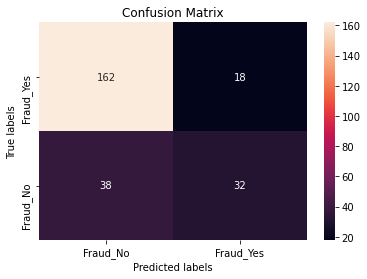

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fraud_No', 'Fraud_Yes']); ax.yaxis.set_ticklabels(['Fraud_Yes', 'Fraud_No']);

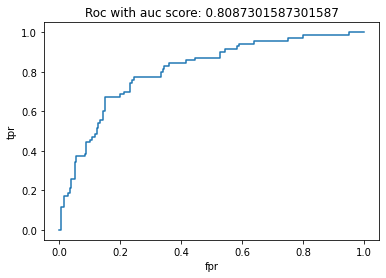

In [295]:

#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

In [296]:
import numpy as np
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
accuracy=[]


skf = StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(X_train, X_test, y_train, y_test)
    
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    prediction=lr.predict(X_test)
    score = accuracy_score(prediction,y_test)
    accuracy.append(score)
    
print(accuracy)
    
    
    

    
    


TRAIN: [ 89  91  96  97 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344

     policy_state_IL  policy_state_IN  policy_state_OH  insured_sex_FEMALE  \
0                  0                0                1                   0   
1                  0                1                0                   0   
2                  0                0                1                   1   
3                  1                0                0                   1   
4                  1                0                0                   0   
..               ...              ...              ...                 ...   
995                0                0                1                   1   
996                1                0                0                   1   
997                0                0                1                   1   
998                1                0                0                   0   
999                0                0                1                   1   

     insured_sex_MALE  insured_education_level_Associate  \
0  

 982 983 984 985 986 987 988 989 990 991 992 993 994 995 996 997 998 999] TEST: [587 591 593 597 600 602 606 607 608 609 610 611 612 613 614 615 616 617
 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635
 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653
 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671
 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689
 690 691 692 693 694 695 696 697 698 699]
     policy_state_IL  policy_state_IN  policy_state_OH  insured_sex_FEMALE  \
0                  0                0                1                   0   
1                  0                1                0                   0   
2                  0                0                1                   1   
3                  1                0                0                   1   
4                  1                0                0                   0   
..               ...              ...        

In [297]:
import numpy as np
np.array(accuracy).mean()

0.8309999999999998

In [298]:
#CONCLUSION: Better accuracy with cv =10(0.8119999999999999) than cv = 4(0.8106666666666665)


OBSERVATIONS:
1) Model showed same accuracy for replacing missing values with Label Encoding & with Mode as Imputation because there wasn't much of a difference between these two methods.Label Encoding was done on categorical variable collision_type	which had 3 levels in it & Null was considered as another level. Accuracy score for both the models was 0.776.

2) Accuracy score of replacing missing values using KNN method was better than imputation with 0 & mode as it calculated the distance between the patterns & accordinlgy filled the values. Accuracy score for KNN method was 0.78 slightly higher than other methods.

3) K-fold cross-validation accuracy was better with cv=10(0.8119999999999999) than cv = 4(0.8106666666666665) as it increases the training data & hence reduces the bias in training data & variance in test data.

4) Accuracy with Stratified K-fold(it takes qual proportion of values from both the claases) 0.83 was slightly higher than K-fold 0.810 as it is used for imbalanced data.

5) After applying class weights to the model there wasn't any changes in the accuracy level of the model that means mmodel is not affected by imbalance in the data which is 7:3 ratio.



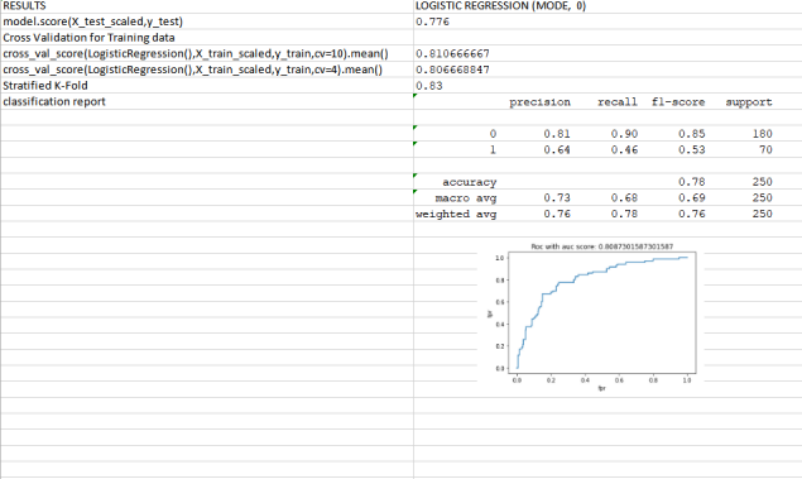

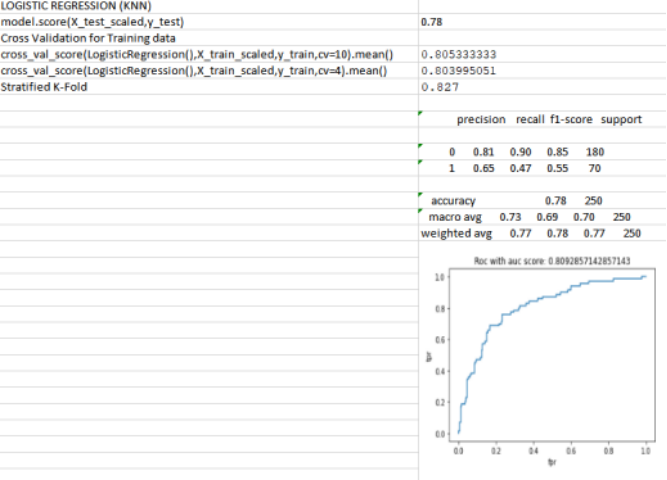

CONCLUSION : 
1) Firstly, this study is restricted by its small sample size.
2) The data only capture incident claims of 3 states from 01 January 2015 to 01 March 2015.We are also restricted to incidents between 2 months which may not be an accurate picture of the year. 
3) Out of actual Fraudulent cases model was able to correctly indentify 46% of fraudulent cases i.e. recall value is 46%.
4) The area under curve of the ROC (ROC AUC) will also be taken into consideration in model selection as a important criteria  to distinguish between fraud and legit claims  which gives the accuracy of 0.8087 which is good fit for this dataset.